In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# đọc file dữ liệu và thể hiện thành dạng cột
colnames = ['Numbers of input', 'Execution time']

data_to_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names = colnames, header = None)

data_to_test = pd.read_csv("http://cs.uit.edu.vn/data3.txt", names = colnames, header = None)

data_to_train.head()

,Numbers of input,Execution time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [5]:
data_to_test.head()

,Numbers of input,Execution time
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831


In [6]:
#phân chia dữ liệu trên tập train
x_train_data = np.array(data_to_train['Numbers of input']).reshape(-1,1)
y_train_data = np.array(data_to_train['Execution time']) 
#phân chia dữ liệu trên tập test
x_test_data = np.array(data_to_test['Numbers of input']).reshape(-1, 1)
y_test_data = np.array(data_to_test['Execution time'])

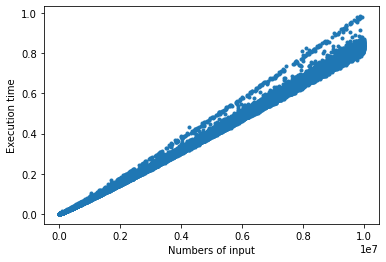

In [7]:
# hiển thị dữ liệu file data2.txt
plt.plot(x_train_data, y_train_data, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.show()

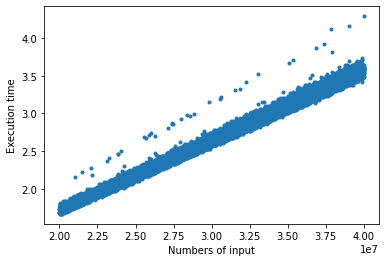

In [8]:
# hiển thị dữ liệu file data3.txt
plt.plot(x_test_data, y_test_data, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.show()

# Train model


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


#tạo model
lr = LinearRegression().fit(x_train_data, y_train_data)


In [14]:
#tính toán độ lỗi của model trên tập dữ liệu train
print("mean squared error data2.txt: ",mean_squared_error(y_train_data, lr.predict(x_train_data)))
# tính toán hệ số ước lượng coefficient of determination: 1 is perfect prediction
print("Coefficient of determination data2.txt: ",r2_score(y_train_data, lr.predict(x_train_data)))

mean squared error data2.txt:  0.00014337728721748832
Coefficient of determination data2.txt:  0.9975924993345858


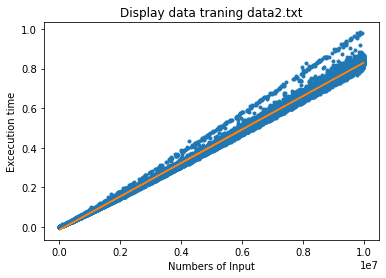

In [11]:
# hiển thị kết quả của việc train
plt.plot(x_train_data, y_train_data, ".")
plt.plot(x_train_data, lr.predict(x_train_data))
plt.title("Display data traning data2.txt")
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

# Test model

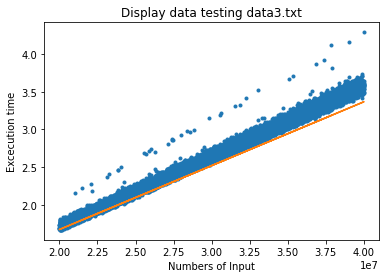

In [12]:
# hiển thị kết quả của việc test

plt.plot(x_test_data, y_test_data, ".")
plt.plot(x_test_data, lr.predict(x_test_data))
plt.title("Display data testing data3.txt")
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

In [15]:
#tính toán độ lỗi của model trên tập dữ liệu test
print("mean squared error data3.txt: ",mean_squared_error(y_test_data, lr.predict(x_test_data)))
# tính toán hệ số ước lượng coefficient of determination: 1 is perfect prediction
print("Coefficient of determination data3.txt: ",r2_score(y_test_data, lr.predict(x_test_data)))

mean squared error data3.txt:  0.020664949397550484
Coefficient of determination data3.txt:  0.9284132208349405


### Đánh giá:
- Số lượng input (Numbers of Input) càng lớn thì thời gian chạy (Excecution time) càng lâu.
- Mean Squared Error (MSE) có giá trị khá nhỏ do giá trị y (Excecution Time) ban đầu đều khá nhỏ.
- Dữ liệu tập train khá sát nhau, còn dữ liệu tập test chứa nhiều dữ liệu nhiễu phân tán ra xa thưa thớt. Vì vậy cho nên khi Test sẽ không xử lí được những dữ liệu ở xa.
- Cách khắc phục là nên tăng tính đa dạng, bao quát nhiều trường hợp khách quan hơn cho tập dữ liệu train hơn nữa.